# Customizing Colorbars

Plot legends identify discrete labels of discrete points. For continuous labels based on the color points, lines, or regions, a labeled colorbar can be a great tool. In MPL, a colorbar is a separate axis that cna provide a key for them meaning of colors in a plot. 

In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

As we have seen several times throughout this section, the simplest colorbar can be created with the plt.colorbar function:


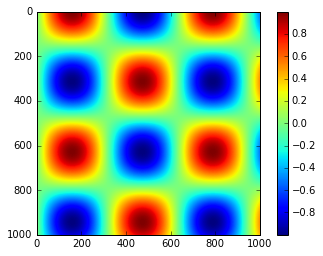

In [5]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

We'll now discuss a few ideas for customizing these colorbars and using them effectively in various situations.


## Customizing Colorbars

The colormap can be specified using the cmap argument to the plotting function that is creating the visualization

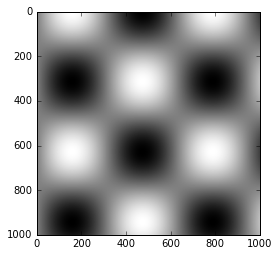

In [6]:
plt.imshow(I, cmap='gray')

All the available colormaps are in the plt.cm namespace; using IPython's tab-completion will give you a full list of built-in possibilities:

    plt.cm.<TAB>
But being able to choose a colormap is just the first step: more important is how to decide among the possibilities! The choice turns out to be much more subtle than you might initially expect.

## Choosing the colormap

A full treatment of color choice within visualization is beyond what I want to show you. Read [Ten Simple Rules for Better Figures](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833). Or you can refer to its documentation [HERE!](http://matplotlib.org/1.4.1/users/colormaps.html)

   - Sequential colormaps: These are made up of one continuous sequence of colors (e.g., binary or viridis).
   - Divergent colormaps: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., RdBu or PuOr).
   - Qualitative colormaps: these mix colors with no particular sequence (e.g., rainbow or jet).
   
The jet colormap, which was previously the default in V 2.0 is an example of a qualitattive colormap. Which means it is bad for quantitative data.

In [14]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RBGA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] **2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """Plt a colormap with its grascale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

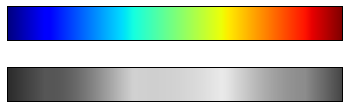

In [15]:
view_colormap('jet')

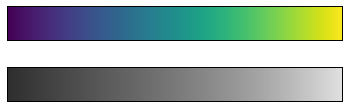

In [16]:
view_colormap('viridis')

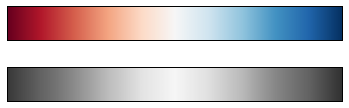

In [17]:
view_colormap('RdBu')
# For 

## Color limits and extensions

Matplotlib allows for a large range of colorbar customization. The colorbar itself is simply an instance of plt.Axes, so all of the axes and tick formatting tricks we've learned are applicable. The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the extend property. This might come in handy, for example, if displaying an image that is subject to noise:

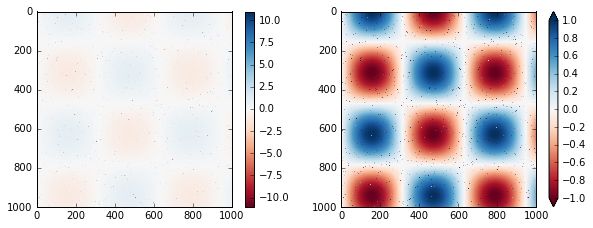

In [18]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in. In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits. The result is a much more useful visualization of our data.

## Discrete Color Bars
Colormaps are by default continuous, but sometimes you'd like to represent discrete values. The easiest way to do this is to use the plt.cm.get_cmap() function, and pass the name of a suitable colormap along with the number of desired bins:

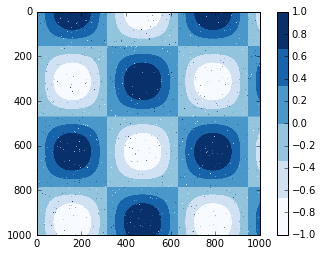

In [19]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);


The discrete version of a colormap can be used just like any other colormap.

## Example: Handwritten Digits
For an example of where this might be useful, let's look at an interesting visualization of some hand written digits data. This data is included in Scikit-Learn, and consists of nearly 2,000 8×88×8 thumbnails showing various hand-written digits.

For now, let's start by downloading the digits data and visualizing several of the example images with plt.imshow():

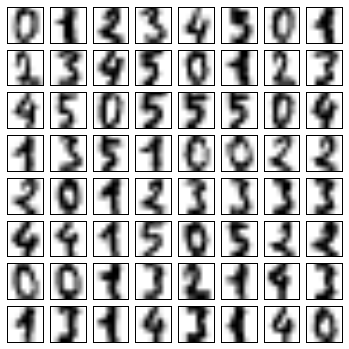

In [21]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Because each digit is defined by the hue of its 64 pixels, we can consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel. But visualizing relationships in such high-dimensional spaces can be extremely difficult. One way to approach this is to use a dimensionality reduction technique such as manifold learning to reduce the dimensionality of the data while maintaining the relationships of interest. Dimensionality reduction is an example of unsupervised machine learning, and we will discuss it in more detail in What Is Machine Learning?.

Deferring the discussion of these details, let's take a look at a two-dimensional manifold learning projection of this digits data (see In-Depth: Manifold Learning for details):

In [26]:
# project the digits into 2 dimmension using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

We'll use our discrete colormap to view the results, setting the ticks and clim to imporve the aesthetics of the resulting colorbar:

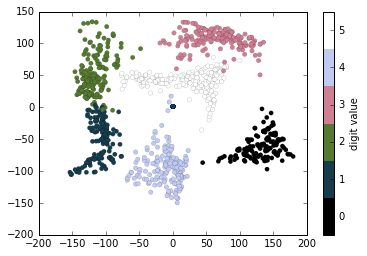

In [28]:
# plot results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)